<a href="https://colab.research.google.com/github/TavleenGill/House-Price-Prediction/blob/main/House_Price_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape
## We have 81 columns and 1460 rows

(1460, 81)

In [4]:
var = df.isnull().sum()
print(var.to_string()) 

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

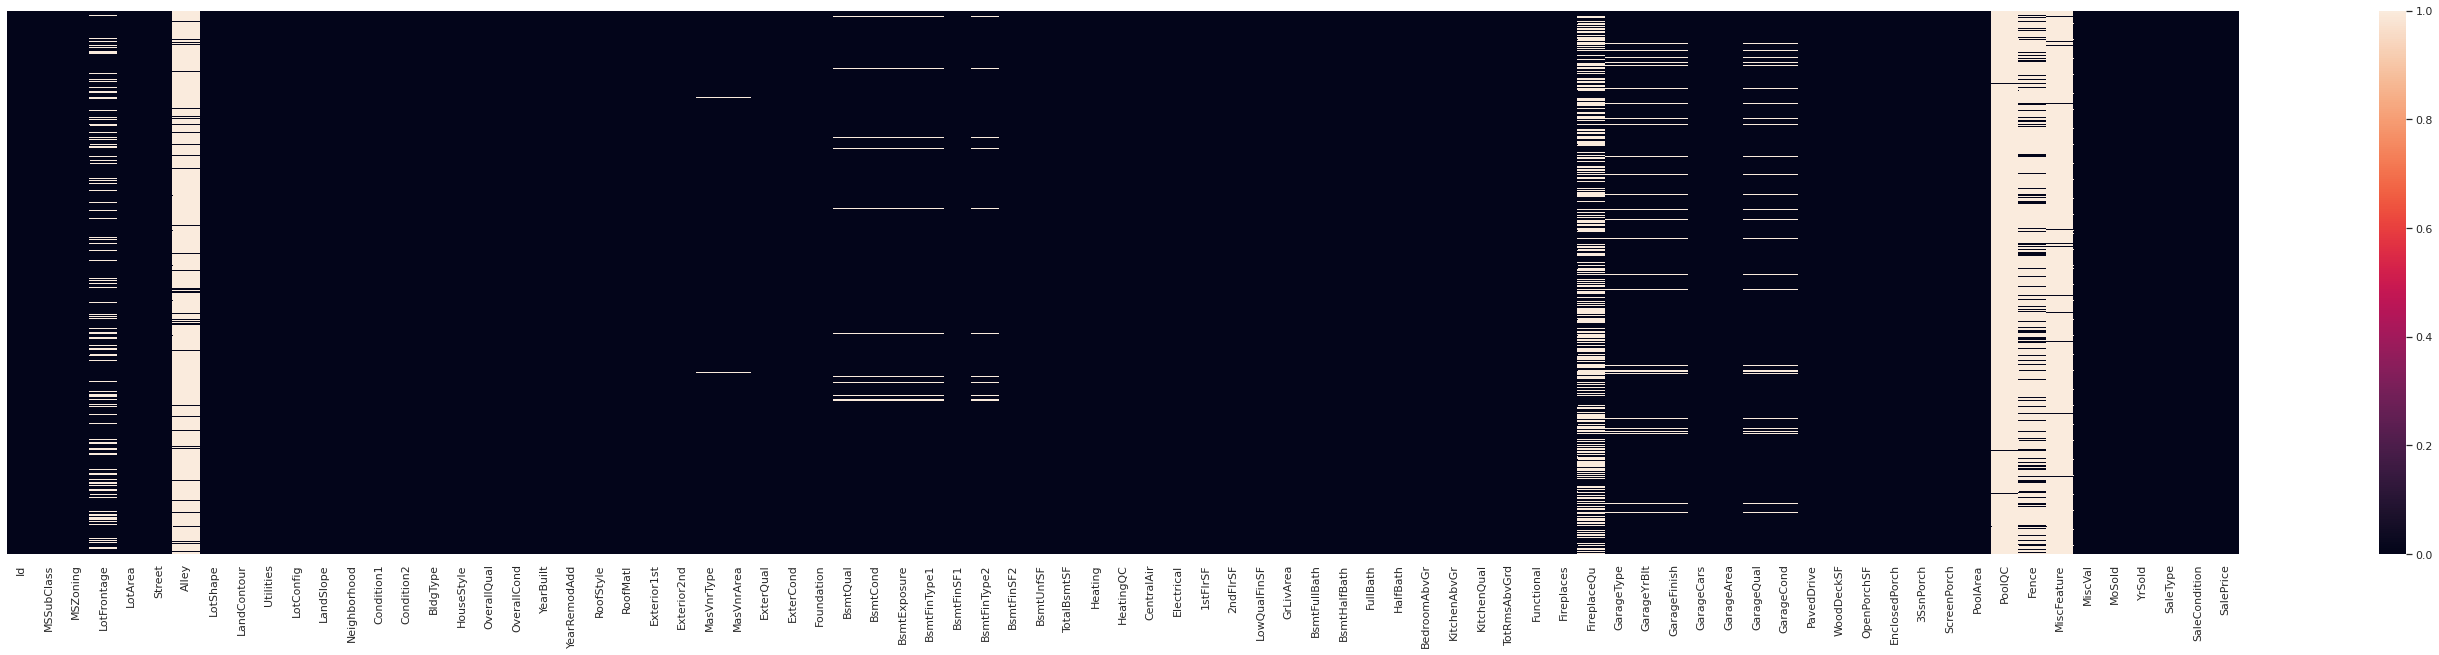

In [5]:
## Using heatmap to check missing values
sns.set(rc={'figure.figsize':(50,10)})
sns.heatmap(df.isnull(),xticklabels=True,yticklabels=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
## Thus we can see that Alley,PoolQC,fence,miscFeature have more than 50% missing data ===> dropped
## ID not needed thus dropped

In [8]:
## Fill missing values
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])

In [9]:
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [10]:
## Dropping columns
df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [11]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean()).astype(int)

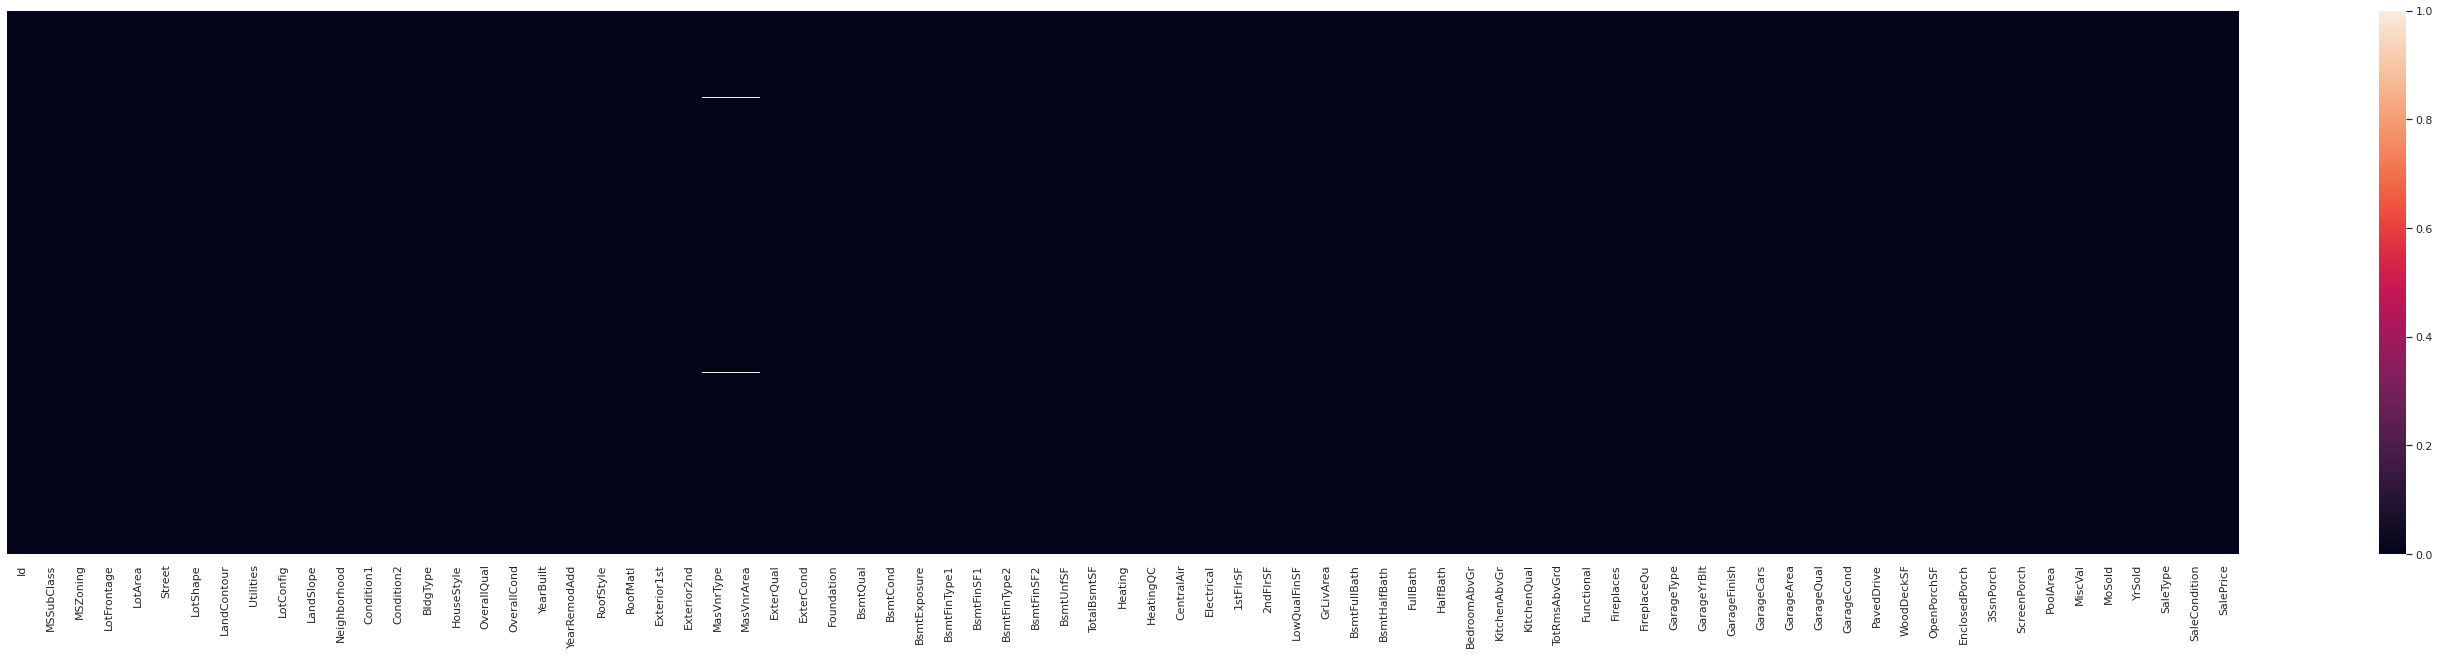

In [12]:
sns.heatmap(df.isnull(),xticklabels=True,yticklabels=False)

In [13]:
df.drop(['Id'],axis=1,inplace=True)

In [14]:
df.dropna(inplace=True)
df.shape

(1451, 76)

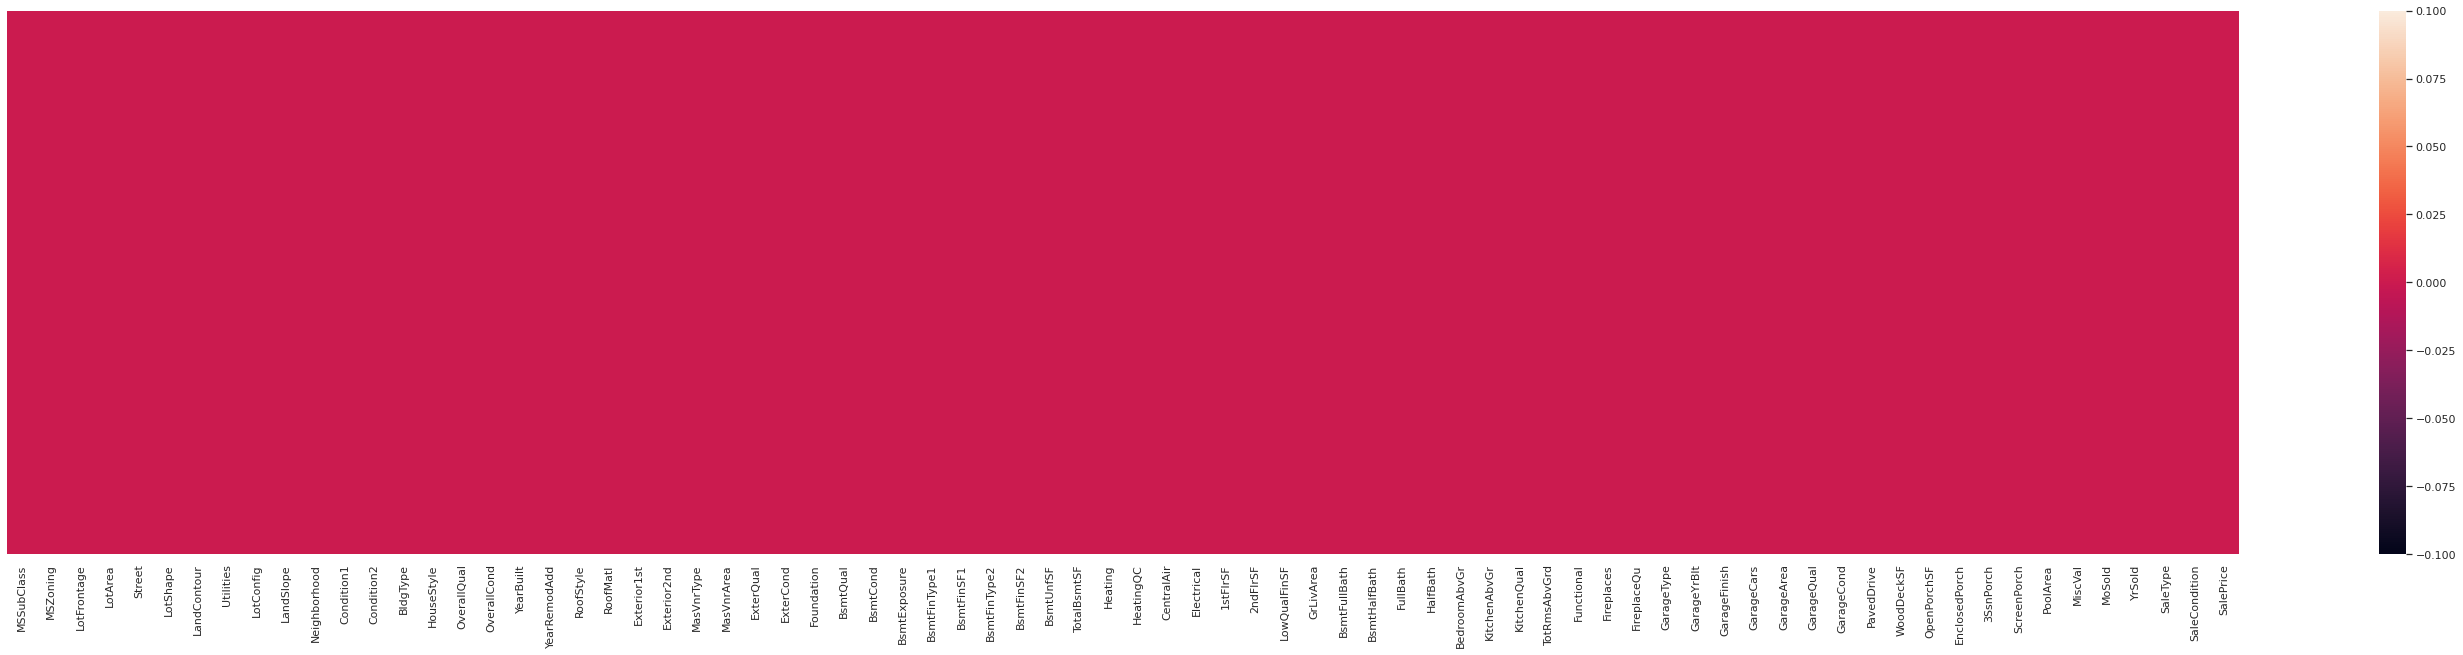

In [15]:
sns.heatmap(df.isnull(),xticklabels=True,yticklabels=False)

In [16]:
df.shape

(1451, 76)

In [17]:
## Handle Categorical Values

cat_columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope',
             'Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
             'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
             'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
             'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual',
             'Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
             'PavedDrive','SaleType','SaleCondition']

In [18]:
len(cat_columns)

39

In [19]:
def category_onehot_mulcols(multcolumns):
  df_final=final_df
  i=0
  for fields in cat_columns:
    print(fields)
    df1=pd.get_dummies(final_df[fields],drop_first=True)
    final_df.drop([fields],axis=1,inplace=True)
    if i==0:
      df_final=df1.copy()
    else:
      df_final=pd.concat([df_final,df1],axis=1)
    i=i+1

  df_final=pd.concat([final_df,df_final],axis=1)

  return df_final

In [20]:
train_df=df.copy()
# # combine test data row wise
test_df=pd.read_csv("formulated.csv")
final_df=pd.concat([train_df,test_df],axis=0)
test_df.shape

(1459, 75)

In [21]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2910, dtype: float64

In [22]:
final_df.shape

(2910, 76)

In [23]:
final_df=category_onehot_mulcols(cat_columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [24]:
final_df.shape

(2910, 237)

In [25]:
final_df=final_df.loc[:,~final_df.columns.duplicated()]

In [26]:
final_df.shape

(2910, 177)

In [27]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [28]:
# splitting train and test data

df_train=final_df.iloc[:1451,:]
df_test=final_df.iloc[1451:,:]

In [29]:
df_train.shape

(1451, 177)

In [30]:
df_test.shape

(1459, 177)

In [31]:
df_test.drop(['SalePrice'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
x_train=df_train.drop(['SalePrice'],axis=1)
y_train=df_train['SalePrice']

In [33]:
x_train.shape

(1451, 176)

# [**Prediction and selecting Algorithm**

In [34]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(x_train,y_train)

[11:00:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [35]:
import pickle
filename='finalized_model.pkl'
pickle.dump(classifier,open(filename,'wb'))

In [36]:
y_pred=classifier.predict(df_test)
y_pred

array([124122.03 , 153566.16 , 180295.03 , ..., 170374.02 , 123946.555,
       241148.44 ], dtype=float32)

In [37]:
## create sample submission

pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)